# Evasion attacks in ART

based on the medium article: [Link](https://kedion.medium.com/ml-security-with-the-adversarial-robustness-toolbox-d173b24e8c1a)

## Importing dependencies

In [1]:
!pip install adversarial-robustness-toolbox

In [2]:
# Importing dependencies
import tensorflow as tf
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import torch.nn as nn
import torch

from art.estimators.classification import TensorFlowV2Classifier
from art.attacks.evasion import FastGradientMethod
from art.utils import load_dataset

matplotlib.rcParams.update({"font.size": 14})


## Loading data

In [3]:

(train_images, train_labels), (test_images, test_labels), min, max = load_dataset(name="mnist")

## Training a TensorFlow Keras model

In [4]:
def create_model():
    model = tf.keras.models.Sequential([
        Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)),
        MaxPool2D(pool_size=2),
        Conv2D(filters=64, kernel_size=3, activation="relu"),
        MaxPool2D(pool_size=2),
        Flatten(),        
        Dense(units=10, activation="softmax")
    ])
    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
        )
    return model

In [5]:
model = create_model()

model.fit(
    x=train_images, 
    y=train_labels, 
    epochs=10,
    batch_size=256)

c:\Users\palla\anaconda3\envs\notebook\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.7774 - loss: 0.8174
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9699 - loss: 0.1014
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 0.9783 - loss: 0.0690
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9828 - loss: 0.0552
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9853 - loss: 0.0475
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9869 - loss: 0.0446
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9884 - loss: 0.0387
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.9895 - loss: 0.0327
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.9911 - loss: 0.0307
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.9909 - loss: 0.0289


## Defining an evasion attack on our model

In [6]:

loss_object = tf.keras.losses.CategoricalCrossentropy()
classifier = TensorFlowV2Classifier(clip_values=(0, 1), model=model, nb_classes=10, input_shape=(28, 28, 1), loss_object=loss_object,)


In [7]:
attack_fgsm = FastGradientMethod(
    estimator=classifier, 
    eps=0.3
    )

In [8]:
test_images_adv = attack_fgsm.generate(x=test_images)

## Evaluating the effectiveness of the attack

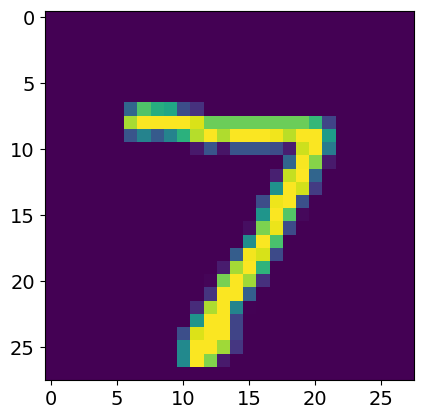

In [9]:
plt.imshow(test_images[0].squeeze())


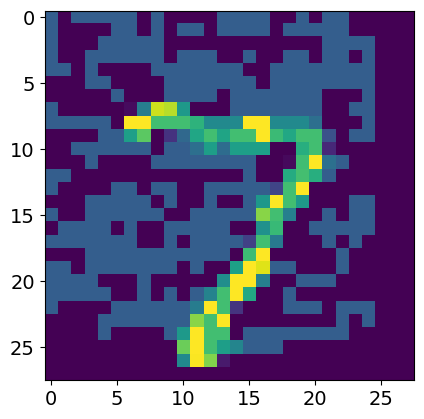

In [10]:
plt.imshow(test_images_adv[0].squeeze())



In [11]:
score_clean = model.evaluate(
    x=test_images, 
    y=test_labels
    )

score_adv = model.evaluate(
    x=test_images_adv, 
    y=test_labels
    )

print(f"Clean test set loss: {score_clean[0]:.2f} " 
      f"vs adversarial set test loss: {score_adv[0]:.2f}")

print(f"Clean test set accuracy: {score_clean[1]:.2f} " 
      f"vs adversarial test set accuracy: {score_adv[1]:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9848 - loss: 0.0446
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0541 - loss: 6.8481
Clean test set loss: 0.04 vs adversarial set test loss: 6.66
Clean test set accuracy: 0.99 vs adversarial test set accuracy: 0.06


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9842 - loss: 0.0456
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9756 - loss: 0.0617
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9436 - loss: 0.1408
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8830 - loss: 0.3116
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7866 - loss: 0.6102
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6602 - loss: 1.0722
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4970 - loss: 1.7104
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3347 - loss: 2.5031
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2156 - loss: 3.3942
1/1 ━━━━━━━━━━━━━━━━━

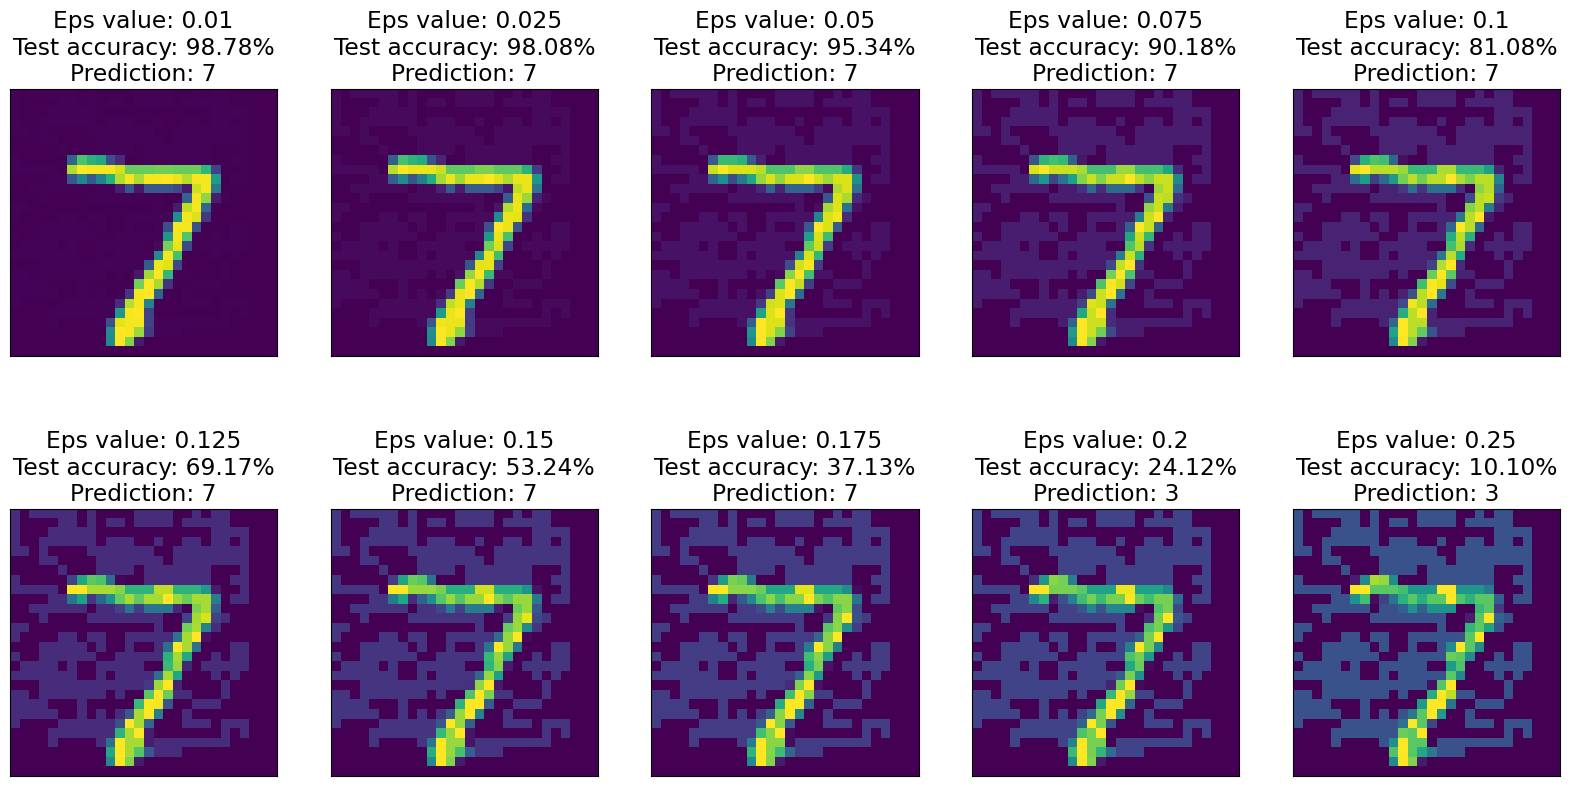

In [12]:
nrows, ncols = 2, 5
fig, axes = plt.subplots(
    nrows=nrows, 
    ncols=ncols, 
    figsize=(20, 10)
    )
eps_to_try = [0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.25]

counter = 0

for i in range(nrows):
    for j in range(ncols):    
        attack_fgsm = FastGradientMethod(
            estimator=classifier, 
            eps=eps_to_try[counter]
            )

        test_images_adv = attack_fgsm.generate(x=test_images)

        axes[i, j].imshow(X=test_images_adv[0].squeeze())

        axes[i, j].set_xticks(ticks=[])
        axes[i, j].set_yticks(ticks=[])

        test_score = classifier._model.evaluate(
            x=test_images_adv, 
            y=test_labels
            )[1]
        prediction = np.argmax(model.predict(
            x=np.expand_dims(a=test_images_adv[0], 
            axis=0)
            ))    

        axes[i, j].set_title(
            label=f"Eps value: {eps_to_try[counter]}\n"
            f"Test accuracy: {test_score * 100:.2f}%\n"
            f"Prediction: {prediction}"
            )

        counter += 1

plt.show()

In [ ]:
# Ensure necessary imports
import torch
import torch.nn as nn
import torch.optim as optim
import CNN

# Define the model
model = CNN().to(device)  # Ensure your CNN model is initialized

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 5  # You can adjust this
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()  # Reset gradients
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()  # Update weights

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100*correct/total:.2f}%")

# Save the trained model
torch.save(model.state_dict(), "model.pth")
print("Model training complete and saved as model.pth")
